### Importación de datos



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=tienda2)

https://docs.google.com/spreadsheets/d/1WjaJLmcZbTg78Xz_91lxP4HMvFO7rFO37YiTCUq1yvw/edit#gid=0


#1. Análisis de facturación



In [62]:
# prompt: muestrame la facturacion total de cada tienda

import pandas as pd

# ... (previous code)

# Calculate total billing for each store
total_billing_tienda = tienda['Precio'].sum()
total_billing_tienda2 = tienda2['Precio'].sum()
total_billing_tienda3 = tienda3['Precio'].sum()
total_billing_tienda4 = tienda4['Precio'].sum()

total_General=total_billing_tienda+total_billing_tienda2+total_billing_tienda3+total_billing_tienda4

# Print the results
print(f"Facturación total de la tienda 1: {total_billing_tienda}")
print(f"Facturación total de la tienda 2: {total_billing_tienda2}")
print(f"Facturación total de la tienda 3: {total_billing_tienda3}")
print(f"Facturación total de la tienda 4: {total_billing_tienda4}")

print(f"Facturación total : {total_General}")


Facturación total de la tienda 1: 1150880400.0
Facturación total de la tienda 2: 1116343500.0
Facturación total de la tienda 3: 1098019600.0
Facturación total de la tienda 4: 1038375700.0
Facturación total : 4403619200.0


# 2. Ventas por categoría

In [58]:
# Lista de DataFrames y sus nombres
tiendas = {
    'tienda': tienda,
    'tienda2': tienda2,
    'tienda3': tienda3,
    'tienda4': tienda4
}

# Mostrar categorías populares por tienda
for nombre, df in tiendas.items():
    categorias_populares = df['Categoría del Producto'].value_counts().reset_index()
    categorias_populares.columns = ['Categoría', 'Cantidad']
    categorias_populares = categorias_populares.sort_values(by='Cantidad', ascending=False)

    print(f"\n--- {nombre.upper()} ---")
    print(categorias_populares)

# Combinar todas las tiendas y mostrar categorías totales
todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
categorias_totales = todas_tiendas['Categoría del Producto'].value_counts().reset_index()
categorias_totales.columns = ['Categoría', 'Cantidad_total']
categorias_totales = categorias_totales.sort_values(by='Cantidad_total', ascending=False)

print("\n--- CATEGORÍAS MÁS POPULARES EN TODAS LAS TIENDAS ---")
print(categorias_totales)



--- TIENDA ---
                 Categoría  Cantidad
0                  Muebles       465
1             Electrónicos       448
2                 Juguetes       324
3        Electrodomésticos       312
4     Deportes y diversión       284
5   Instrumentos musicales       182
6                   Libros       173
7  Artículos para el hogar       171

--- TIENDA2 ---
                 Categoría  Cantidad
0                  Muebles       442
1             Electrónicos       422
2                 Juguetes       313
3        Electrodomésticos       305
4     Deportes y diversión       275
5   Instrumentos musicales       224
6                   Libros       197
7  Artículos para el hogar       181

--- TIENDA3 ---
                 Categoría  Cantidad
0                  Muebles       499
1             Electrónicos       451
2                 Juguetes       315
3        Electrodomésticos       278
4     Deportes y diversión       277
5                   Libros       185
6   Instrumentos musicale

# 3. Calificación promedio de la tienda


In [67]:
# prompt: de acuerdo al codigo anterior, sacar el promedio de Calificación por tienda, con 3 decimales y el promedio de calificacion total

# Calculate the average rating for each store
average_rating_tienda = tienda['Calificación'].mean()
average_rating_tienda2 = tienda2['Calificación'].mean()
average_rating_tienda3 = tienda3['Calificación'].mean()
average_rating_tienda4 = tienda4['Calificación'].mean()

# Print the average ratings with 3 decimal places
print(f"Calificación promedio de la tienda 1: {average_rating_tienda:.3f}")
print(f"Calificación promedio de la tienda 2: {average_rating_tienda2:.3f}")
print(f"Calificación promedio de la tienda 3: {average_rating_tienda3:.3f}")
print(f"Calificación promedio de la tienda 4: {average_rating_tienda4:.3f}")

# Calculate the overall average rating
overall_average_rating = (average_rating_tienda + average_rating_tienda2 + average_rating_tienda3 + average_rating_tienda4) / 4

# Print the overall average rating with 3 decimal places
print(f"Calificación promedio total: {overall_average_rating:.3f}")


Calificación promedio de la tienda 1: 3.977
Calificación promedio de la tienda 2: 4.037
Calificación promedio de la tienda 3: 4.048
Calificación promedio de la tienda 4: 3.996
Calificación promedio total: 4.015


# 4. Productos más y menos vendidos

In [69]:
# prompt: calcular el producto mas vendido y menos vendido por tienda , y

# ... (previous code)

# Function to find the most and least sold products per store
def find_top_bottom_products(df, store_name):
    product_counts = df['Producto'].value_counts()
    most_sold = product_counts.index[0]
    least_sold = product_counts.index[-1]
    return most_sold, least_sold

# Find most and least sold products for each store
for name, df in tiendas.items():
    most_sold, least_sold = find_top_bottom_products(df, name)
    print(f"\n--- {name.upper()} ---")
    print(f"Producto más vendido: {most_sold}")
    print(f"Producto menos vendido: {least_sold}")



--- TIENDA ---
Producto más vendido: Microondas
Producto menos vendido: Celular ABXY

--- TIENDA2 ---
Producto más vendido: Iniciando en programación
Producto menos vendido: Juego de mesa

--- TIENDA3 ---
Producto más vendido: Kit de bancas
Producto menos vendido: Bloques de construcción

--- TIENDA4 ---
Producto más vendido: Cama box
Producto menos vendido: Guitarra eléctrica


In [71]:
# prompt: calcular el producto mas vendido y menos vendido de todas las tiendas

import pandas as pd
# Combine all stores into a single DataFrame
all_stores_df = pd.concat([tienda, tienda2, tienda3, tienda4])

# Calculate the total sales of each product across all stores
product_sales = all_stores_df['Producto'].value_counts()

# Find the most and least sold products
most_sold_product = product_sales.index[0]
least_sold_product = product_sales.index[-1]

# Print the results
print(f"\n--- ALL STORES ---")
print(f"Producto más vendido: {most_sold_product}")
print(f"Producto menos vendido: {least_sold_product}")



--- ALL STORES ---
Producto más vendido: Mesa de noche
Producto menos vendido: Celular ABXY


# 5. Envío promedio por tienda

In [72]:
# prompt: calcular el costo promedio por tienda

# Calculate the average shipping cost for each store
average_shipping_tienda = tienda['Costo de envío'].mean()
average_shipping_tienda2 = tienda2['Costo de envío'].mean()
average_shipping_tienda3 = tienda3['Costo de envío'].mean()
average_shipping_tienda4 = tienda4['Costo de envío'].mean()

# Print the average shipping costs
print(f"Costo de envío promedio de la tienda 1: {average_shipping_tienda:.2f}")
print(f"Costo de envío promedio de la tienda 2: {average_shipping_tienda2:.2f}")
print(f"Costo de envío promedio de la tienda 3: {average_shipping_tienda3:.2f}")
print(f"Costo de envío promedio de la tienda 4: {average_shipping_tienda4:.2f}")

# Calculate the overall average shipping cost
overall_average_shipping = (average_shipping_tienda + average_shipping_tienda2 + average_shipping_tienda3 + average_shipping_tienda4) / 4

# Print the overall average shipping cost
print(f"Costo de envío promedio total: {overall_average_shipping:.2f}")


Costo de envío promedio de la tienda 1: 26018.61
Costo de envío promedio de la tienda 2: 25216.24
Costo de envío promedio de la tienda 3: 24805.68
Costo de envío promedio de la tienda 4: 23459.46
Costo de envío promedio total: 24875.00


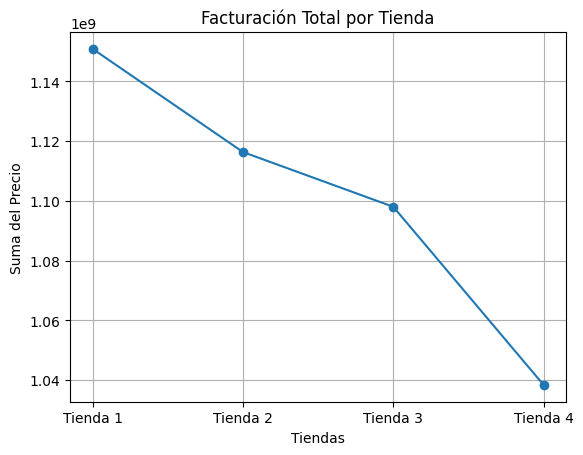

In [76]:
# prompt: hacer un grafico de lineas de las 4 tiendas , con la suma del precio

import matplotlib.pyplot as plt

# Data for the plot
stores = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
total_billings = [total_billing_tienda, total_billing_tienda2, total_billing_tienda3, total_billing_tienda4]

# Create the line plot
plt.plot(stores, total_billings, marker='o')

# Customize the plot
plt.xlabel('Tiendas')
plt.ylabel('Suma del Precio')
plt.title('Facturación Total por Tienda')
plt.grid(True)

# Show the plot
plt.show()


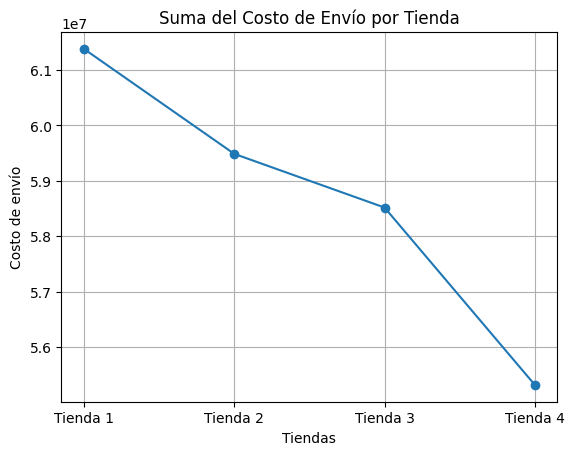

In [77]:
# prompt: hacer un grafico de lineas de las 4 tiendas , con la suma del costo envio

import matplotlib.pyplot as plt
# Data for the plot
stores = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
shipping_costs = [tienda['Costo de envío'].sum(), tienda2['Costo de envío'].sum(), tienda3['Costo de envío'].sum(), tienda4['Costo de envío'].sum()]

# Create the line plot
plt.plot(stores, shipping_costs, marker='o')

# Customize the plot
plt.xlabel('Tiendas')
plt.ylabel('Costo de envío')
plt.title('Suma del Costo de Envío por Tienda')
plt.grid(True)

# Show the plot
plt.show()


Utilidad total de la tienda 1: 1089502500.0
Utilidad total de la tienda 2: 1056858400.0
Utilidad total de la tienda 3: 1039503000.0
Utilidad total de la tienda 4: 983058300.0


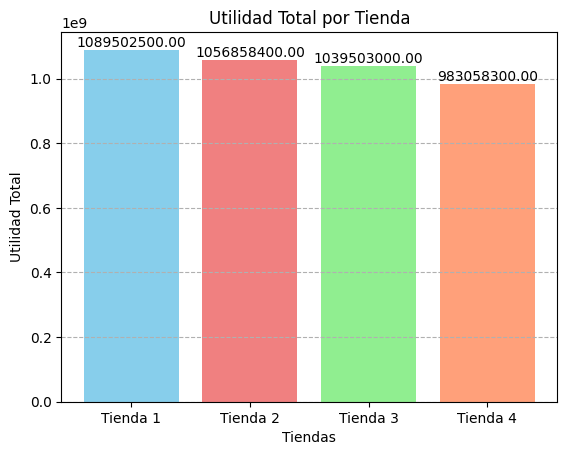

In [79]:
# prompt: calcular utilidad por tienda , precio menos costo envío y graficar

import matplotlib.pyplot as plt
# Calculate profit for each store
tienda['Utilidad'] = tienda['Precio'] - tienda['Costo de envío']
tienda2['Utilidad'] = tienda2['Precio'] - tienda2['Costo de envío']
tienda3['Utilidad'] = tienda3['Precio'] - tienda3['Costo de envío']
tienda4['Utilidad'] = tienda4['Precio'] - tienda4['Costo de envío']

# Calculate total profit for each store
total_profit_tienda = tienda['Utilidad'].sum()
total_profit_tienda2 = tienda2['Utilidad'].sum()
total_profit_tienda3 = tienda3['Utilidad'].sum()
total_profit_tienda4 = tienda4['Utilidad'].sum()

# Print the total profit for each store
print(f"Utilidad total de la tienda 1: {total_profit_tienda}")
print(f"Utilidad total de la tienda 2: {total_profit_tienda2}")
print(f"Utilidad total de la tienda 3: {total_profit_tienda3}")
print(f"Utilidad total de la tienda 4: {total_profit_tienda4}")

# Data for the plot
stores = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
total_profits = [total_profit_tienda, total_profit_tienda2, total_profit_tienda3, total_profit_tienda4]

# Create the bar plot
plt.bar(stores, total_profits, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])

# Customize the plot
plt.xlabel('Tiendas')
plt.ylabel('Utilidad Total')
plt.title('Utilidad Total por Tienda')
plt.grid(axis='y', linestyle='--')

# Add value labels on top of each bar
for i, profit in enumerate(total_profits):
    plt.text(i, profit, f'{profit:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


**Diagnostico**

De acuerdo a los analisis de los datos, la tienda 4 es la que tiene menos facturación , y aunque sus costos de envío son bajos , es la que tiene menos utilidad por ultimo su calificacion es de un 3.996, la tercera mas baja. Por lo tanto la tienda 4 debería cerrar.